In [105]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers


In [106]:
flowers = tfds.load("oxford_flowers102")
training = flowers["train"]
testing = flowers["test"]
validation = flowers["validation"]
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [107]:
BATCH_SIZE  = 32
LABEL_COUNT = 102
INPUT_SHAPE = (224, 224)
MODEL_INPUT_SHAPE = INPUT_SHAPE + (3,)
EPOCHS = 30
MAX_TIME = 2 * 60 * 60


In [108]:
def format_image(item):
  image = tf.image.resize(item["image"], INPUT_SHAPE)
  label = item["label"]
  return image, label

In [109]:
training = training.map(format_image)
testing = testing.map(format_image)
validation = validation.map(format_image)

training_batches = training.batch(BATCH_SIZE)
testing_batches = testing.batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)

In [110]:
model = keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=MODEL_INPUT_SHAPE),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(LABEL_COUNT)
])


In [111]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [112]:
model.compile(optimizer='adam', 
              loss=loss_fn,
              metrics=['accuracy'])

In [113]:
time_stopping_callback = tfa.callbacks.TimeStopping(seconds=MAX_TIME, verbose=1)

history = model.fit(training_batches
                    , epochs=EPOCHS, validation_data=validation_batches, callbacks=[time_stopping_callback])

Epoch 1/5
32/32 [==============================] - 767s 24s/step - loss: 4.6375 - accuracy: 0.0108 - val_loss: 4.5266 - val_accuracy: 0.0108
Epoch 2/5
32/32 [==============================] - 756s 24s/step - loss: 4.3949 - accuracy: 0.0363 - val_loss: 4.2657 - val_accuracy: 0.0412
Epoch 3/5
32/32 [==============================] - 747s 23s/step - loss: 3.7692 - accuracy: 0.1461 - val_loss: 4.0059 - val_accuracy: 0.1010
Epoch 4/5
32/32 [==============================] - 737s 23s/step - loss: 2.2017 - accuracy: 0.4588 - val_loss: 4.9626 - val_accuracy: 0.1108
Epoch 5/5
32/32 [==============================] - 741s 23s/step - loss: 1.0025 - accuracy: 0.7608 - val_loss: 5.6511 - val_accuracy: 0.1000


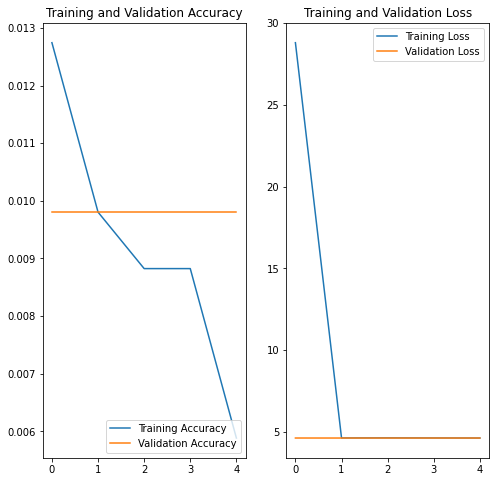

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [114]:
model.evaluate(testing_batches, verbose = True)

193/193 [==============================] - 181s 936ms/step - loss: 5.9722 - accuracy: 0.0784


[5.972168445587158, 0.07838673144578934]